## Capstone 2 Project: Prediction of WAR in MLB players

<div class="alert alert-block alert-info">
In this notebook, I will be examining the data (MLB seasons 1977 - 2017) from data wrangling a little further and attempt to answer the below questions:

1. How does WAR vary by player position?
2. Has the average WAR value changed over the MLB seasons?
3. Do the American League and National League players have comparable WAR values?
4. How does player age affect various statistics?
5. What is the age distribution for different player positions?


In [2]:
import csv
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# disable warnings
warnings.filterwarnings('ignore')   


mlb_df = pd.read_csv('capstone_2_df.csv')
mlb_df.drop(columns=['SampleID.1', 'POS.1'], axis=0, inplace=True)

pd.set_option('display.max_columns', 50)
plt.style.use('ggplot')

In [3]:
# preliminary exploration of data set

mlb_df.describe()

,SampleID,yearID,AGE,G,GS,PA,AB,R,H,1B,2B,3B,HR,TB,BB,IBB,SO,SF,SH,RBI,DP,SB,CS,AVG,OBP,SLG,OPS,ISO,oppOPS,DRC+,DRC+ SD,BRR,BWARP,InnOuts,Def_PO,Def_A,Def_E,Def_DP,Def_PB,Def_WP,Def_SB,Def_CS,Def_ZR,Def_DRAA,Def_FRAA
count,18621.000000,18621.000000,18621.000000,18621.000000,18614.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.000000,18621.0,18621.000000,18621.000000,18621.0,18621.000000,18621.000000
mean,25185.360829,1997.790989,28.544761,99.282960,57.900720,355.724397,317.193813,42.797379,84.433596,57.371355,15.968584,1.936631,9.157027,131.746523,30.942753,2.655174,56.247677,2.705440,2.156436,40.494818,7.208367,6.404543,2.846947,0.255527,0.321618,0.392264,0.713820,0.136739,0.730558,93.218409,17.033457,0.079609,1.156630,2091.344181,254.760163,90.969604,6.101445,23.555341,0.702594,0.0,6.349981,2.862682,0.0,1.593808,0.122920
std,21249.428759,11.778648,4.120564,41.655386,52.898609,201.303607,178.736722,29.575826,53.056965,36.134389,11.119700,2.346184,9.539085,87.950787,23.720919,3.910539,35.921863,2.469006,3.046818,29.941833,5.397873,10.073781,3.477392,0.039359,0.045825,0.085256,0.122036,0.062571,0.029686,22.572288,4.521593,2.410549,1.669955,1258.025224,266.332003,126.369497,5.806656,33.315921,2.205342,0.0,18.042952,8.537772,0.0,11.987890,6.666083
min,3.000000,1977.000000,18.000000,14.000000,0.000000,51.000000,51.000000,0.000000,4.000000,2.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067000,0.097000,0.067000,0.000000,0.000000,0.629000,-46.000000,6.000000,-9.600000,-3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,-39.600000,-58.000000
25%,8551.000000,1988.000000,25.000000,64.000000,9.000000,170.000000,152.000000,17.000000,36.000000,25.000000,7.000000,0.000000,2.000000,54.000000,12.000000,0.000000,27.000000,1.000000,0.000000,16.000000,3.000000,1.000000,0.000000,0.232000,0.294000,0.336000,0.636000,0.091000,0.710000,78.000000,14.000000,-1.300000,-0.000000,943.000000,85.000000,6.000000,2.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,-4.600000,-2.900000
50%,17633.000000,1998.000000,28.000000,103.000000,40.000000,339.000000,303.000000,37.000000,77.000000,53.000000,14.000000,1.000000,6.000000,117.000000,25.000000,1.000000,49.000000,2.000000,1.000000,34.000000,6.000000,2.000000,2.000000,0.258000,0.323000,0.390000,0.714000,0.131000,0.731000,91.000000,16.000000,-0.100000,0.600000,1971.000000,177.000000,30.000000,4.000000,7.000000,0.000000,0.0,0.000000,0.000000,0.0,-1.500000,-0.200000
75%,38000.000000,2008.000000,31.000000,137.000000,105.000000,535.000000,477.000000,64.000000,128.000000,85.000000,24.000000,3.000000,13.000000,199.000000,44.000000,4.000000,79.000000,4.000000,3.000000,59.000000,10.000000,8.000000,4.000000,0.282000,0.352000,0.447000,0.791000,0.177000,0.752000,106.000000,20.000000,1.200000,1.900000,3206.000000,302.000000,119.000000,8.000000,32.000000,0.000000,0.0,0.000000,0.000000,0.0,4.400000,2.700000
max,66771.000000,2017.000000,48.000000,164.000000,162.000000,778.000000,716.000000,152.000000,262.000000,225.000000,59.000000,23.000000,73.000000,425.000000,232.000000,120.000000,223.000000,18.000000,40.000000,165.000000,36.000000,130.000000,42.000000,0.411000,0.609000,0.910000,1.422000,0.537000,0.847000,243.000000,41.000000,17.400000,12.200000,7784.000000,1626.000000,905.000000,54.000000,221.000000,35.000000,0.0,155.000000,89.000000,0.0,121.400000,48.200000


__1. How does WAR vary by player position?__

Text(0.5, 1.0, 'Average WAR by Position')

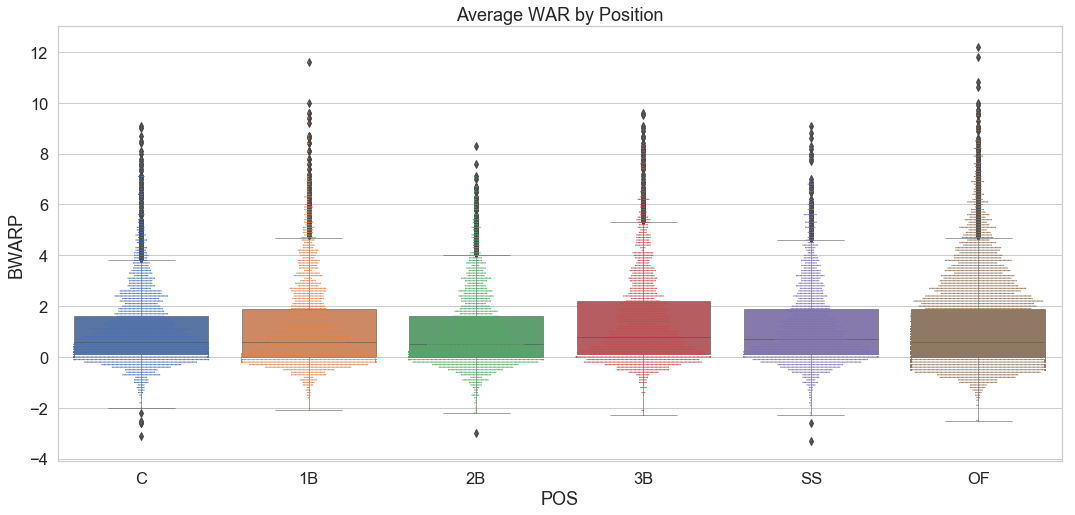

In [4]:
fig = plt.figure(figsize=(18,8))

sns.set(style="whitegrid", font_scale=1.5)
sns.boxplot(x='POS', y='BWARP', data=mlb_df, linewidth=.5, order=['C', '1B', '2B', '3B', 'SS', 'OF'])
sns.swarmplot(x='POS', y='BWARP', data=mlb_df, size=1.25, order=['C', '1B', '2B', '3B', 'SS', 'OF'])
plt.title('Average WAR by Position')


In [17]:
groupby_POS_df = mlb_df.groupby('POS')
print('Average WAR by player position:\n')
print(groupby_POS_df.BWARP.mean(), '\n')

print('WAR standard deviation by player position:\n')
print(groupby_POS_df.BWARP.std())

Average WAR by player position:

POS
1B    1.193814
2B    0.953627
3B    1.409639
C     1.039761
OF    1.174797
SS    1.157733
Name: BWARP, dtype: float64 

WAR standard deviation by player position:

POS
1B    1.783888
2B    1.469018
3B    1.819574
C     1.483866
OF    1.715315
SS    1.610035
Name: BWARP, dtype: float64


<div class="alert alert-block alert-info">
It appears that most positions have an average WAR value of 1.1.  Third basemen tend to average higher, at 1.4 while 2B have the lowest average, at 0.95.

__2. How has the average WAR value changed over the MLB seasons?__

Text(0.5,1,'Average player WAR over MLB Seasons')

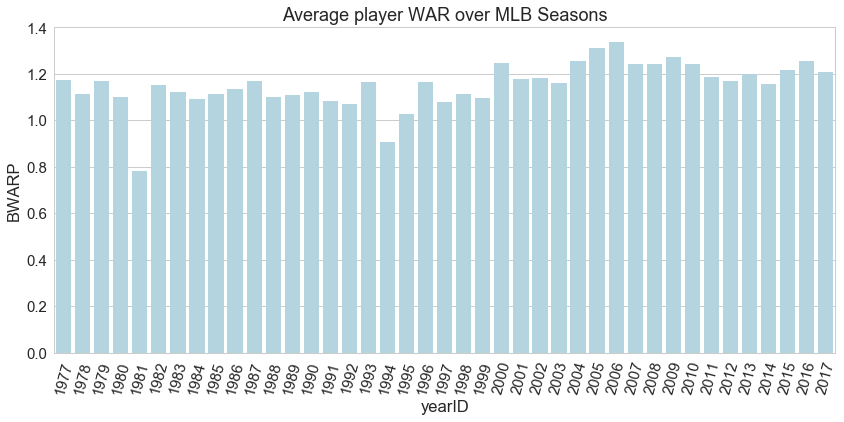

In [4]:
by_season_df = mlb_df.groupby('yearID').agg('mean')
by_season_df.reset_index(inplace=True)

fig = plt.figure(figsize=(14,6))
sns.barplot(x='yearID', y='BWARP', data=by_season_df, color='lightblue')
plt.xticks(rotation=75)
plt.title('Average player WAR over MLB Seasons')

<div class="alert alert-block alert-info">
When we look at the data, we observe a slight increase in the average WAR value after 2000.  Before 2000, we see that for most years that players have an average WAR value of around 1.1; after 2000, we see an average WAR value that is closer to 1.2.

__3. Do the American League and National League players have comparable WAR values?__

Text(0.5,1,'American v. National League average WAR')

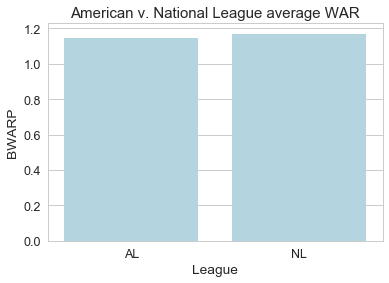

In [6]:
by_league_df = mlb_df.groupby('League').agg('mean')
by_league_df.reset_index(inplace=True)

sns.set(style="whitegrid", font_scale=1.25)
sns.barplot(x='League', y='BWARP', data=by_league_df, color="lightblue")
plt.title('American v. National League average WAR')

In [15]:
groupby_league_df = mlb_df.groupby('League')
print('Average WAR by League:\n')
print(groupby_league_df.BWARP.mean(), '\n')
print('WAR standard deviation by League:\n')
print(groupby_league_df.BWARP.std())

Average WAR by League:

League
AL    1.143296
NL    1.169936
Name: BWARP, dtype: float64 

WAR standard deviation by League:

League
AL    1.644253
NL    1.695199
Name: BWARP, dtype: float64


<div class="alert alert-block alert-info">
Despite employing slightly different rules (American League bats designated hitter in place of pitchers), the average WAR value of players in the AL and NL are fairly close, 1.14 vs 1.17.

__4. How does player age affect various statistics?__

Text(0.5,0.98,'WAR by Player Age')

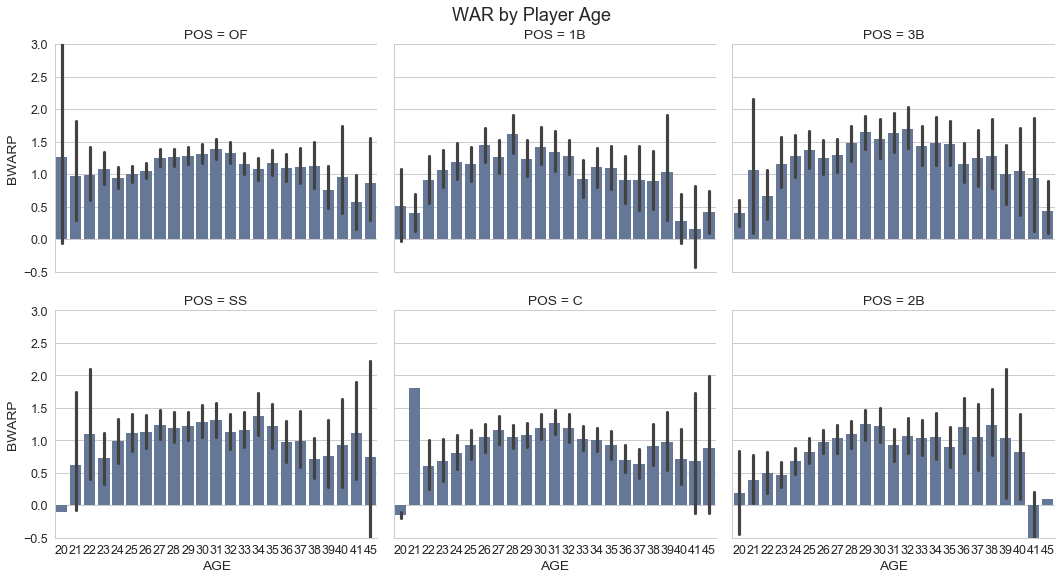

In [88]:
g = sns.FacetGrid(mlb_df, col="POS", xlim=(18, 48), col_wrap=3, size=4, aspect=1.25, ylim=(-.5, 3))
g.map(sns.barplot, 'AGE', 'BWARP', saturation=.5)
g.fig.suptitle('WAR by Player Age', verticalalignment='bottom')

Text(0.5,0.98,'Defensive Outs Played by Player Age')

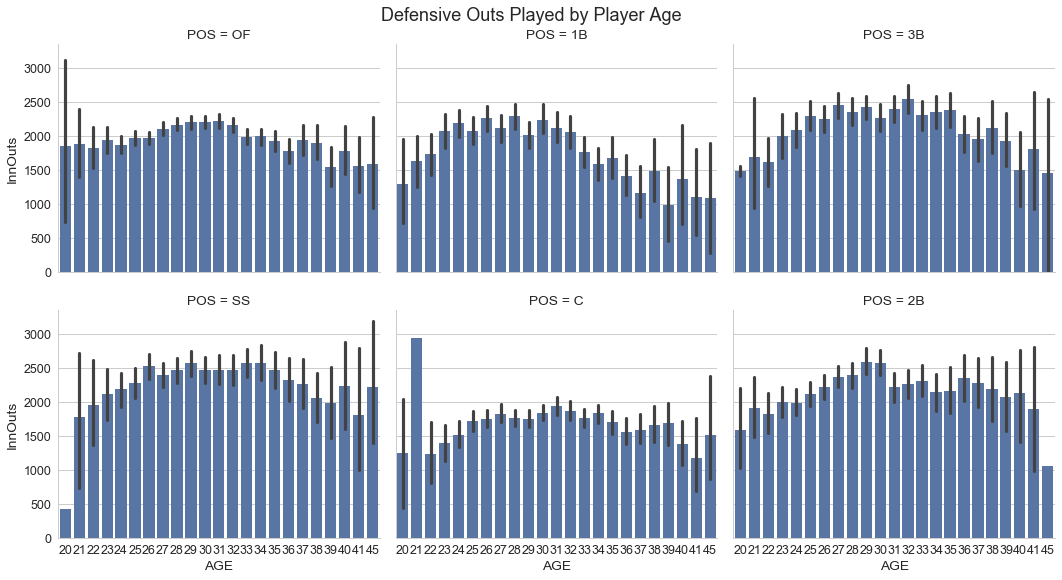

In [96]:
g = sns.FacetGrid(mlb_df, col="POS", xlim=(18, 48), col_wrap=3, size=4, aspect=1.25)
g.map(sns.barplot, 'AGE', 'InnOuts')
g.fig.suptitle('Defensive Outs Played by Player Age', verticalalignment='bottom')

Text(0.5,0.98,'Defensive Outs Played by Player Age')

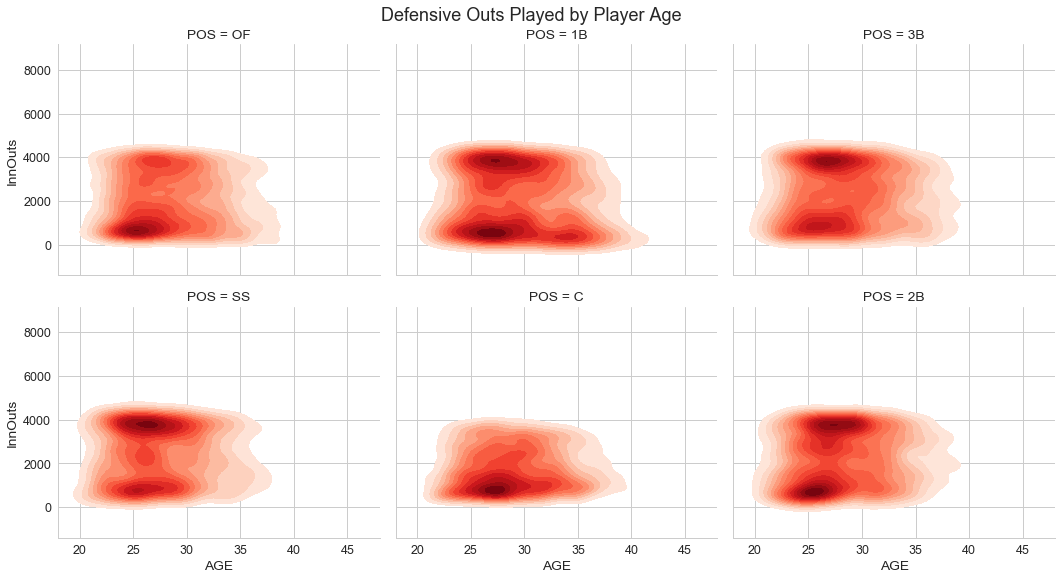

In [97]:
g = sns.FacetGrid(mlb_df, col="POS", xlim=(18, 48), col_wrap=3, size=4, aspect=1.25)
g.map(sns.kdeplot, 'AGE', 'InnOuts', cmap="Reds", shade=True, shade_lowest=False, n_levels=15)
g.fig.suptitle('Defensive Outs Played by Player Age', verticalalignment='bottom')

Text(0.5,0.98,'ISO by Player Age')

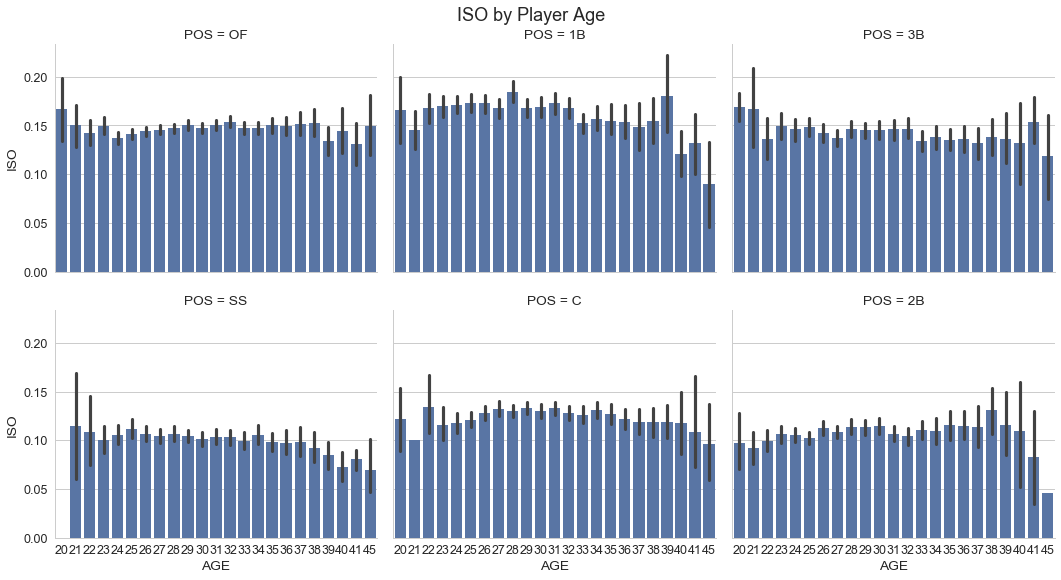

In [110]:
g = sns.FacetGrid(mlb_df, col="POS", xlim=(18, 48), col_wrap=3, size=4, aspect=1.25)
g.map(sns.barplot, 'AGE', 'ISO')
g.fig.suptitle('ISO by Player Age', verticalalignment='bottom')

Text(0.5,0.98,'ISO by Player Age')

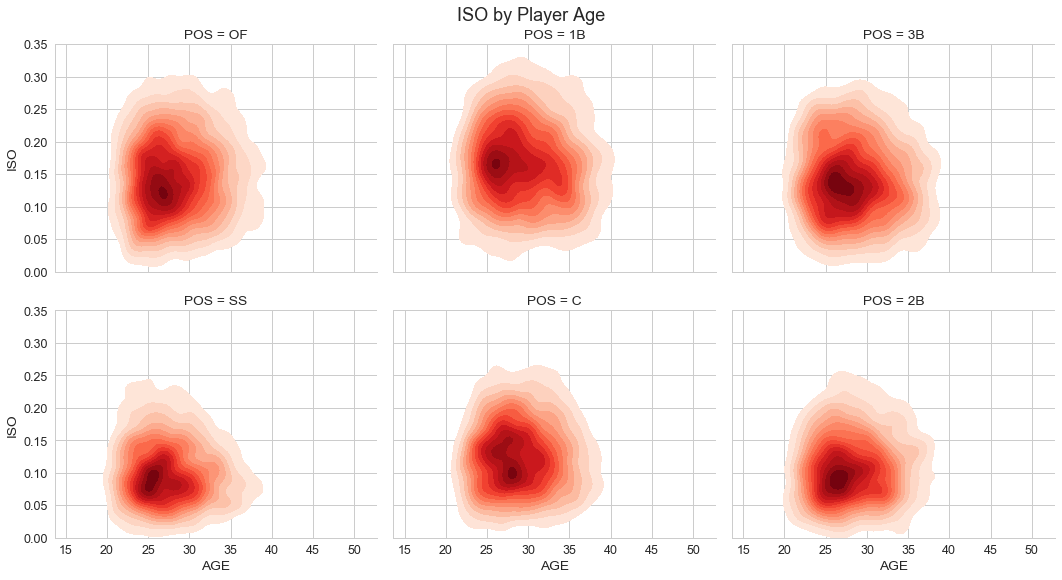

In [115]:
g = sns.FacetGrid(mlb_df, col="POS", ylim=(0, .35), col_wrap=3, size=4, aspect=1.25)
g.map(sns.kdeplot, 'AGE', 'ISO', cmap="Reds", shade=True, shade_lowest=False, n_levels=15)
g.fig.suptitle('ISO by Player Age', verticalalignment='bottom')

Text(0.5,0.98,'DRAA by Player Age')

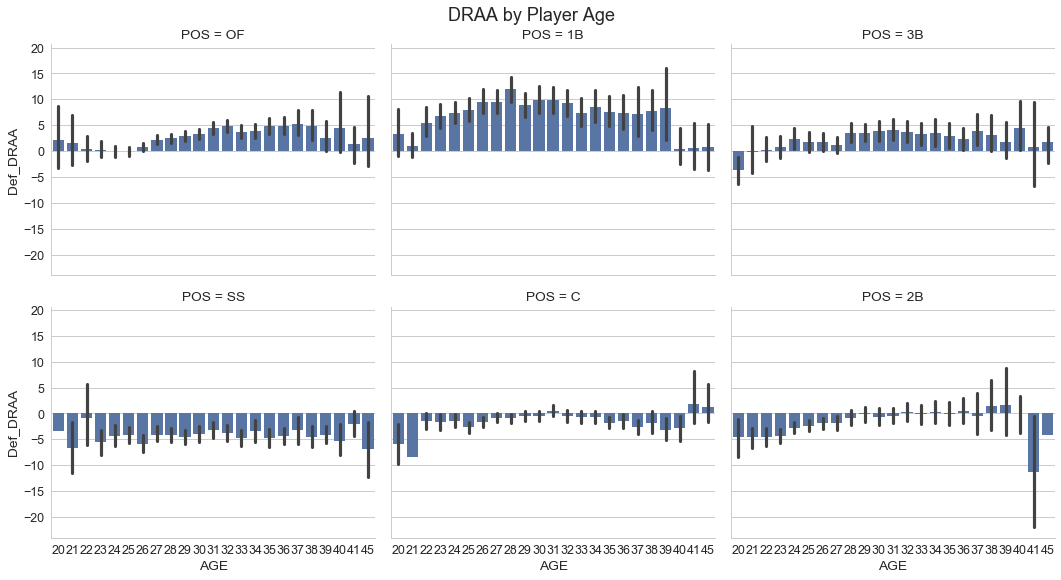

In [107]:
g = sns.FacetGrid(mlb_df, col="POS", xlim=(18, 48), col_wrap=3, size=4, aspect=1.25)
g.map(sns.barplot, 'AGE', 'Def_DRAA')
g.fig.suptitle('DRAA by Player Age', verticalalignment='bottom')

Text(0.5,0.98,'HR by Player Age')

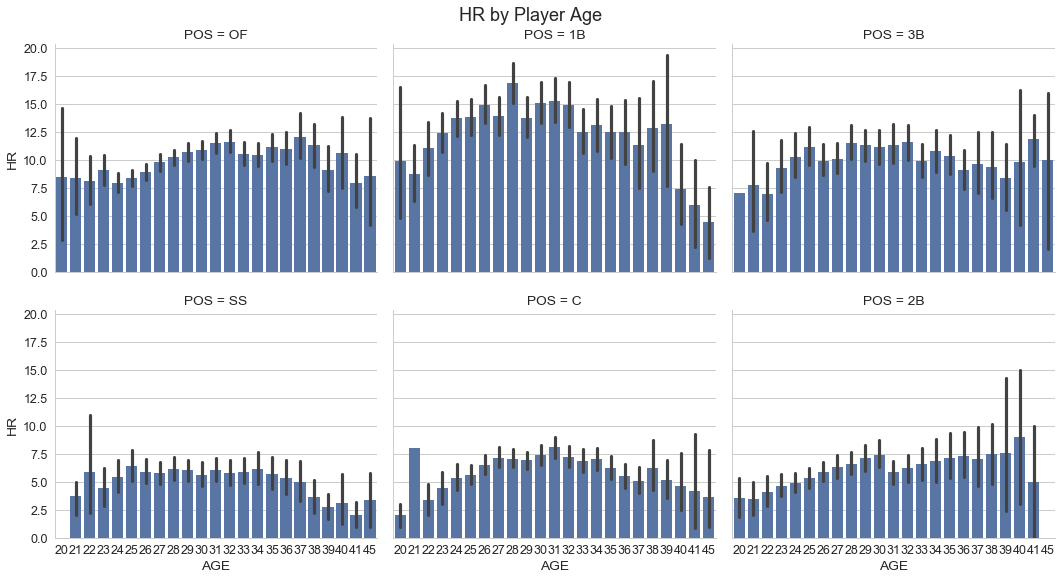

In [105]:
g = sns.FacetGrid(mlb_df, col="POS", xlim=(18, 48), col_wrap=3, size=4, aspect=1.25)
g.map(sns.barplot, 'AGE', 'HR')
g.fig.suptitle('HR by Player Age', verticalalignment='bottom')

Text(0.5,0.98,'HR by Player Age')

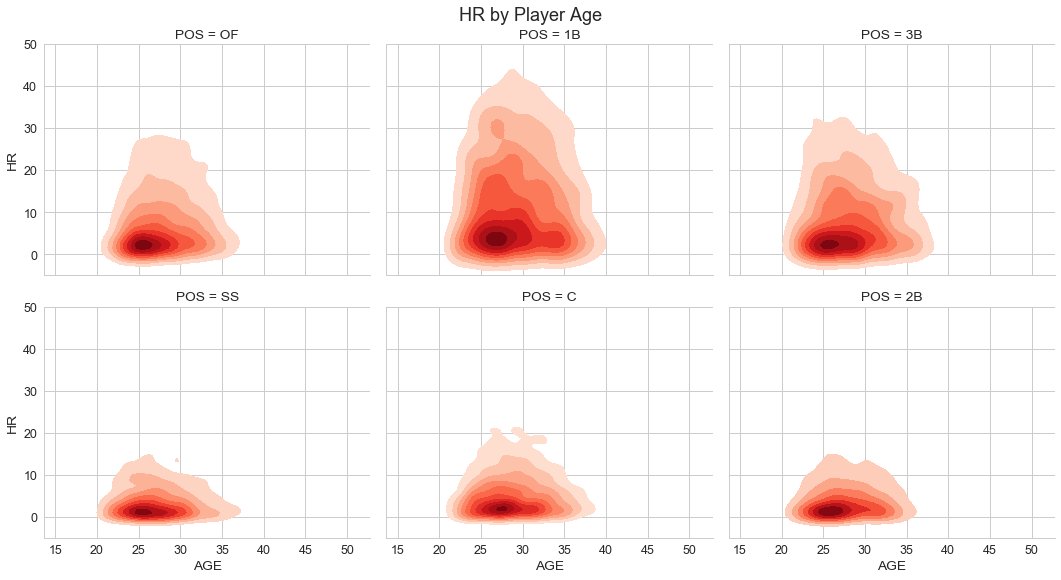

In [106]:
g = sns.FacetGrid(mlb_df, col="POS", ylim=(-5, 50), col_wrap=3, size=4, aspect=1.25)
g.map(sns.kdeplot, 'AGE', 'HR', cmap="Reds", shade=True, shade_lowest=False, n_levels=10)
g.fig.suptitle('HR by Player Age', verticalalignment='bottom')

Text(0.5,0.98,'SLG by Player Age')

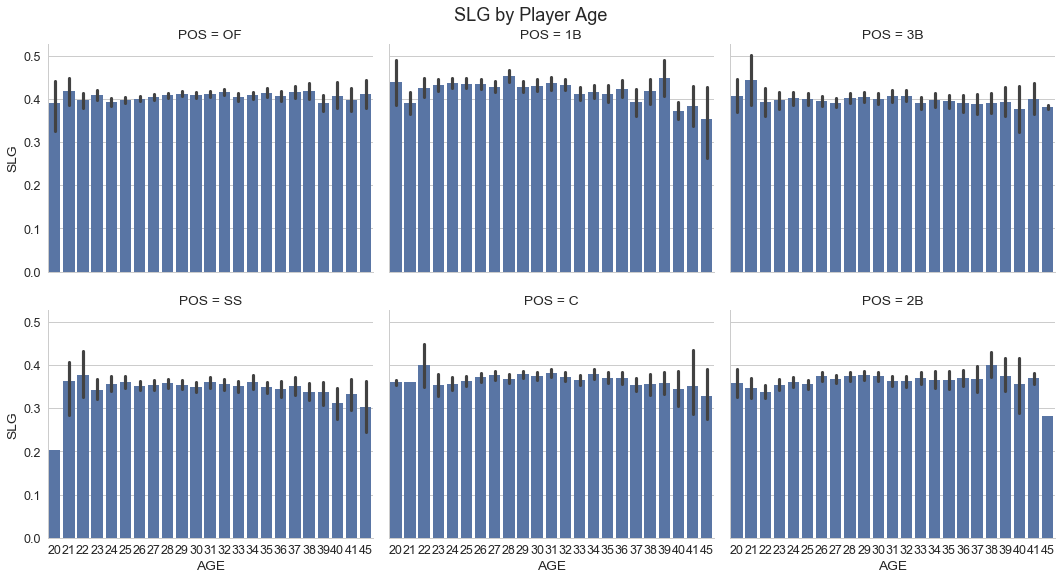

In [99]:
g = sns.FacetGrid(mlb_df, col="POS", xlim=(18, 48), col_wrap=3, size=4, aspect=1.25)
g.map(sns.barplot, 'AGE', 'SLG')
g.fig.suptitle('SLG by Player Age', verticalalignment='bottom')

<div class="alert alert-block alert-info">
From plotting various metrics against age, there are several findings:<br>
    1. For the positions of 1B, 2B, 3B and SS, there are two clusters of players in their mid to late 20's that play approx 4000 defensive outs and another cluster that plays several hundred defensive outs.<br> 
    2. Most positions hit the majority of their home runs between their mid 20's and mid 30's.  The variance of number of home runs hit per season is increased for younger and older players.<br>
    3. Most positions see their peak WAR production in their late 20's to early 30's.

__5. What is the age distribution for different player positions?__

CPU times: user 440 ms, sys: 14 ms, total: 454 ms
Wall time: 465 ms


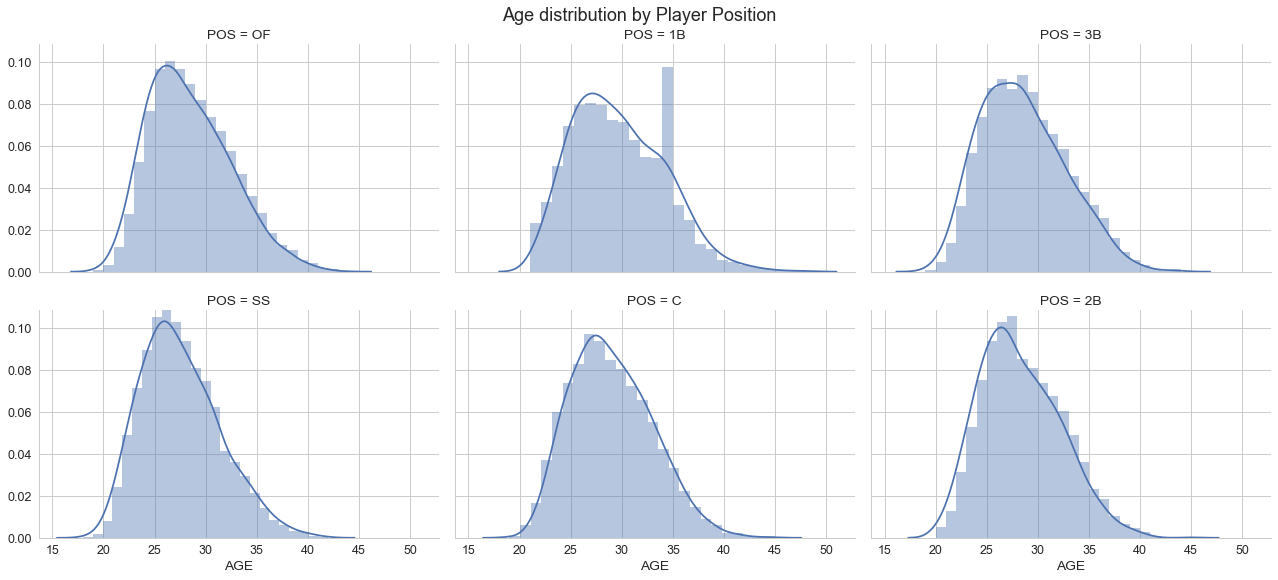

In [98]:
%%time

g = sns.FacetGrid(mlb_df, col="POS", col_wrap=3, size=4, aspect=1.5)
g.map(sns.distplot, "AGE", bins=25)
g.fig.suptitle('Age distribution by Player Position', verticalalignment='bottom')

In [18]:
print('Position age mean:\n')
print(groupby_POS_df.AGE.mean(), '\n')

print('Position age standard deviation:\n')
print(groupby_POS_df.AGE.std())

Position age mean:

POS
1B    29.665378
2B    28.235078
3B    28.487488
C     29.025372
OF    28.397508
SS    27.530642
Name: AGE, dtype: float64 

Position age standard deviation:

POS
1B    4.466479
2B    3.932226
3B    4.166736
C     3.957727
OF    4.061122
SS    3.921124
Name: AGE, dtype: float64


<div class="alert alert-block alert-info">
After plotting the age distribution of the players by position, it appears that most positions are filled by players in their late 20's and early 30's.  First basemen seem to have slightly longer longevity than other positions while shortstops tend to be skew younger.